In [0]:
from bs4 import BeautifulSoup


In [0]:
# still many cleaning jobs to do

import re
def get_data(season,episode,tags):
    seasons,episodes = [],[]
    roles,lines = [],[]
    for e in tags:
        role = None
        for child in e.descendants:
            if child.string is not None:              
                if child.name is None and child.string.strip():
                    s = child.string.strip()
#                     print(s)
                    if s[-1] == ":":  
                        role = s[:-1]
#                         print(role)
                    else:
                        if role is not None:
                            line = child.string.replace("\n"," ")
                            line = re.sub(r'\([^)]*\)', '', line)
                            line = re.sub(r'\[[^)]*\]', '', line)
                            line = line.strip()

                            if line:
                                if len(roles) > 0 and role == roles[-1] and len(lines) > 0 and line[0].islower():
                                    if not lines[-1][-1].isalpha():
                                        line = " "+line 
                                    lines[-1] += line
                                else:
                                    seasons.append(season)
                                    episodes.append(episode)
                                    roles.append(role)
                                    lines.append(line)
            #                         if len(roles) > 1 and role == roles[-2]:
    #                                 print("---")
    #                                 print("person: %s" % role)
    #                                 print("says: %s" % line)

    print(len(set(roles)))
    return seasons,episodes,roles,lines

In [0]:
import pandas as pd
pd.options.display.max_rows = 20


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
pwd_path = "/content/gdrive/My Drive/friends"

# Data Acquisition

In [7]:
import glob
import os

files = {}
for season in range(1,11):
    path = pwd_path + '/season{0:02d}/'.format(season)

    files[season] = [f for f in glob.glob(path + "{0:02d}*.html".format(season), recursive=True)]

files

{1: ['/content/gdrive/My Drive/friends/season01/0111.html',
  '/content/gdrive/My Drive/friends/season01/0124.html',
  '/content/gdrive/My Drive/friends/season01/0103.html',
  '/content/gdrive/My Drive/friends/season01/0106.html',
  '/content/gdrive/My Drive/friends/season01/0119.html',
  '/content/gdrive/My Drive/friends/season01/0120.html',
  '/content/gdrive/My Drive/friends/season01/0117.html',
  '/content/gdrive/My Drive/friends/season01/0107.html',
  '/content/gdrive/My Drive/friends/season01/0104.html',
  '/content/gdrive/My Drive/friends/season01/0109.html',
  '/content/gdrive/My Drive/friends/season01/0112.html',
  '/content/gdrive/My Drive/friends/season01/0123.html',
  '/content/gdrive/My Drive/friends/season01/0105.html',
  '/content/gdrive/My Drive/friends/season01/0101.html',
  '/content/gdrive/My Drive/friends/season01/0110.html',
  '/content/gdrive/My Drive/friends/season01/0102.html',
  '/content/gdrive/My Drive/friends/season01/0118.html',
  '/content/gdrive/My Drive/

In [8]:
dfs = []
for season,fns in files.items():
    print(season)
#     if season > 1:
#         break
    episode = 0
    for fn in fns:
        print(fn)
        episode += 1
#         if episode > 3:
#             break
        with open(fn, "r", encoding='utf-8', errors='ignore') as f:
            content = f.read()
#             content = content.replace('<font size="3">', '')#<font size="3">
#             content = content.replace('</font>', '')#</font>
            soup = BeautifulSoup(content)
            tags = soup.find_all('p')
            seasons,episodes,roles,lines = get_data(season,episode,tags)
            if len(set(roles)) >= 6:
                df = pd.DataFrame({'seasons': seasons, 'episodes':episodes, 'roles':roles,'lines':lines})
                dfs.append(df)
            
data = pd.concat(dfs, ignore_index=True)

1
/content/gdrive/My Drive/friends/season01/0111.html
14
/content/gdrive/My Drive/friends/season01/0124.html
14
/content/gdrive/My Drive/friends/season01/0103.html
12
/content/gdrive/My Drive/friends/season01/0106.html
11
/content/gdrive/My Drive/friends/season01/0119.html
15
/content/gdrive/My Drive/friends/season01/0120.html
14
/content/gdrive/My Drive/friends/season01/0117.html
8
/content/gdrive/My Drive/friends/season01/0107.html
11
/content/gdrive/My Drive/friends/season01/0104.html
18
/content/gdrive/My Drive/friends/season01/0109.html
13
/content/gdrive/My Drive/friends/season01/0112.html
17
/content/gdrive/My Drive/friends/season01/0123.html
16
/content/gdrive/My Drive/friends/season01/0105.html
11
/content/gdrive/My Drive/friends/season01/0101.html
13
/content/gdrive/My Drive/friends/season01/0110.html
14
/content/gdrive/My Drive/friends/season01/0102.html
16
/content/gdrive/My Drive/friends/season01/0118.html
13
/content/gdrive/My Drive/friends/season01/0122.html
12
/content/

In [9]:
data.to_csv(pwd_path + "/friends.csv",index=False)
data

,seasons,episodes,roles,lines
0,1,1,Transcribed by,guineapig
1,1,1,Phoebe,Do you think they have yesterday's daily news?
2,1,1,Monica,Why?
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r..."
4,1,1,Monica,"Oh my God. Phoebe. Don't look now, but behind..."
5,1,1,Phoebe,"Where? Ooh, come to Momma."
6,1,1,Monica,"He's coming. Be cool, be cool, be cool."
7,1,1,Guy,Nice hat.
8,1,1,Monica and Phoebe,Thanks.
9,1,1,Phoebe,We should do something. Whistle.


Data Analysis

In [10]:
lines_by_role = data.groupby('roles').size()
lines_by_role

roles
                         1
1st Customer             1
2nd Customer             1
3rd Customer             2
A Casino Boss            1
A Tourist                1
A Waiter                 1
A Waiter in Drag         1
Actor                    1
Actress/Olivia           7
                        ..
Woman At The Wedding     2
Woman No. 1              4
Woman No. 2              1
Woman at door            2
Written by              18
Young Ethan             28
Zack                     3
Zoe                      1
[Scene                  25
an                       8
Length: 513, dtype: int64

In [11]:
main_roles = lines_by_role.index[lines_by_role >= 100]
print(len(main_roles))
main_roles

15


Index(['All', 'Carol', 'Chandler', 'Emily', 'Frank', 'Janice', 'Joey',
       'Monica', 'Mr. Geller', 'Paul', 'Pete', 'Phoebe', 'Rachel', 'Ross',
       'Transcribed by'],
      dtype='object', name='roles')

In [12]:
data = data[data.roles.isin(main_roles)]
data = data[data.roles != 'Transcribed by']
data

,seasons,episodes,roles,lines
1,1,1,Phoebe,Do you think they have yesterday's daily news?
2,1,1,Monica,Why?
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r..."
4,1,1,Monica,"Oh my God. Phoebe. Don't look now, but behind..."
5,1,1,Phoebe,"Where? Ooh, come to Momma."
6,1,1,Monica,"He's coming. Be cool, be cool, be cool."
9,1,1,Phoebe,We should do something. Whistle.
10,1,1,Monica,We are not going to whistle.
11,1,1,Phoebe,"Come on, do it."
12,1,1,Monica,No!


In [13]:
lines_by_role = data.groupby(['roles','seasons']).size().unstack()
lines_by_role = lines_by_role.fillna(0)
lines_by_role = lines_by_role.astype(int)
lines_by_role

seasons,1,2,3,4,5,6,7,8,9,10
roles,,,,,,,,,,
All,88,4,53,28,21,20,11,3,1,4
Carol,76,9,28,11,6,0,5,0,0,0
Chandler,819,43,803,613,566,588,524,406,420,114
Emily,0,0,0,85,20,0,0,0,0,0
Frank,0,0,79,18,8,0,0,0,0,0
Janice,38,0,66,19,6,0,10,0,5,1
Joey,601,48,769,540,601,511,562,495,448,139
Monica,859,66,828,449,565,483,585,510,432,114
Mr. Geller,25,0,11,0,5,12,34,2,20,0


In [14]:
lines_by_role_total = lines_by_role.sum(axis=1)
lines_by_role_total = lines_by_role_total.sort_values(ascending=False)
lines_by_role_top = lines_by_role_total[:10]
lines_by_role_top['others'] = lines_by_role_total[10:].sum()
lines_by_role_top = lines_by_role_top.sort_values(ascending=False)
lines_by_role_top

roles
Rachel        5291
Ross          5252
Chandler      4896
Monica        4891
Joey          4714
Phoebe        4349
others         413
All            233
Janice         145
Carol          135
Mr. Geller     109
dtype: int64

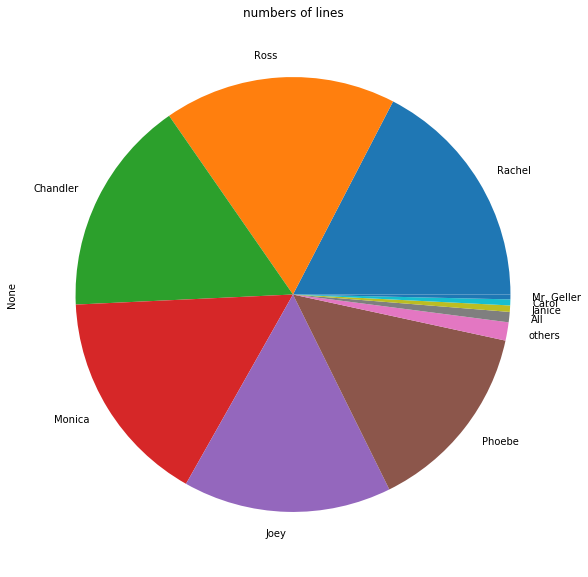

In [15]:
lines_by_role_top.plot(figsize=(10, 10),kind='pie',title="numbers of lines")

In [16]:
lines_by_role_main = lines_by_role[lines_by_role.index.isin(lines_by_role_top.index)]
lines_by_role_main

seasons,1,2,3,4,5,6,7,8,9,10
roles,,,,,,,,,,
All,88,4,53,28,21,20,11,3,1,4
Carol,76,9,28,11,6,0,5,0,0,0
Chandler,819,43,803,613,566,588,524,406,420,114
Janice,38,0,66,19,6,0,10,0,5,1
Joey,601,48,769,540,601,511,562,495,448,139
Monica,859,66,828,449,565,483,585,510,432,114
Mr. Geller,25,0,11,0,5,12,34,2,20,0
Phoebe,595,60,776,442,542,467,474,479,381,133
Rachel,813,85,906,548,549,573,659,568,436,154


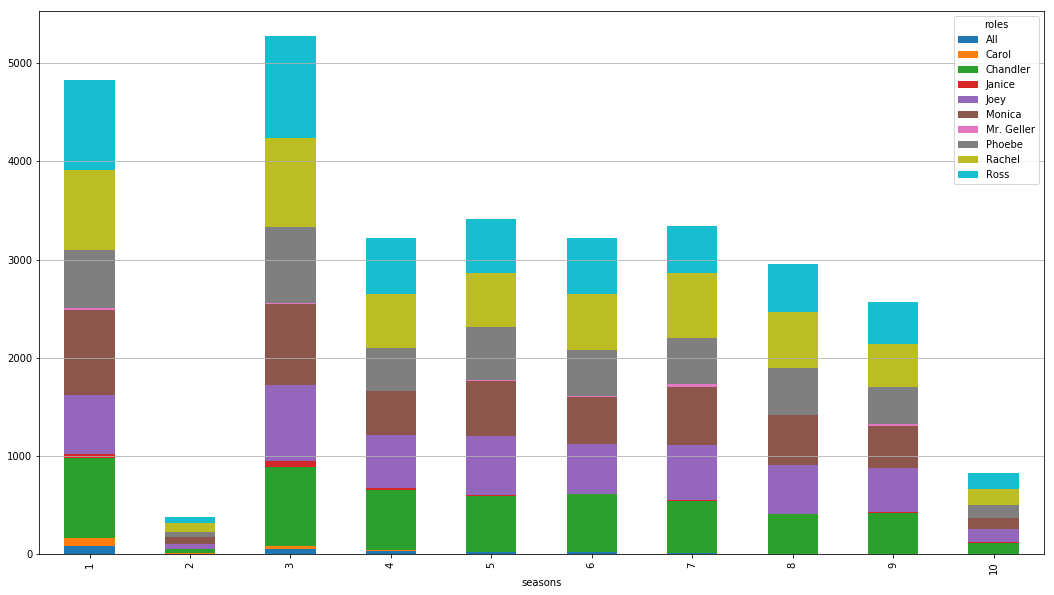

In [17]:
ax = lines_by_role_main.transpose().loc[:,:].plot.bar(stacked=True, figsize=(18,10))
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.grid(True, axis='y')

In [18]:
data.shape

(30428, 4)

In [19]:
data = data[data.roles.isin(['Rachel','Ross','Chandler','Monica','Phoebe','Joey'])]
data.shape

(29393, 4)

Machine Learning

In [20]:
import numpy as np
data['female'] = np.where(data.roles.isin(['Rachel','Monica','Phoebe']), 1, 0)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,seasons,episodes,roles,lines,female
1,1,1,Phoebe,Do you think they have yesterday's daily news?,1
2,1,1,Monica,Why?,1
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r...",1
4,1,1,Monica,"Oh my God. Phoebe. Don't look now, but behind...",1
5,1,1,Phoebe,"Where? Ooh, come to Momma.",1
6,1,1,Monica,"He's coming. Be cool, be cool, be cool.",1
9,1,1,Phoebe,We should do something. Whistle.,1
10,1,1,Monica,We are not going to whistle.,1
11,1,1,Phoebe,"Come on, do it.",1
12,1,1,Monica,No!,1


In [21]:
data['female'].mean()

0.4943694076821012

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['lines'], 
                                                   data['female'],
                                                   random_state=0)
# print(X_train[0])
print(X_train.shape)

(22044,)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=3).fit(X_train)

In [24]:
vect.get_feature_names()[::200]

['00',
 'awful',
 'brolin',
 'cleansing',
 'depressed',
 'excellent',
 'gavin',
 'hole',
 'killed',
 'margarita',
 'none',
 'picked',
 'rejection',
 'shake',
 'stealing',
 'throws',
 'warren']

In [25]:
len(vect.get_feature_names())

3347

In [26]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<22044x3347 sparse matrix of type '<class 'numpy.int64'>'
	with 179890 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5977596469728783


In [29]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('10 Smallest Coefs: ')
print(feature_names[sorted_coef_index[:10]])
print('\n10 Largest Coefs: ')
print(feature_names[sorted_coef_index[:-11:-1]])

10 Smallest Coefs: 
['dude' 'buddy' 'joe' 'correct' 'cameras' 'angela' 'gotten' 'cheating'
 'trouble' 'gandolf']

10 Largest Coefs: 
['engaged' 'gosh' 'bald' 'melissa' 'ralph' 'honey' 'barry' 'jason'
 'massage' 'tag']


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=3).fit(X_train)
len(vect.get_feature_names())

3347

In [31]:
vect.get_feature_names()[::200]

['00',
 'awful',
 'brolin',
 'cleansing',
 'depressed',
 'excellent',
 'gavin',
 'hole',
 'killed',
 'margarita',
 'none',
 'picked',
 'rejection',
 'shake',
 'stealing',
 'throws',
 'warren']

In [32]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized


model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.5999973697819808


In [33]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('10 Smallest Coefs: ')
print(feature_names[sorted_coef_index[:10]])
print('\n10 Largest Coefs: ')
print(feature_names[sorted_coef_index[:-11:-1]])

10 Smallest Coefs: 
['man' 'ah' 'dude' 'joe' 'uh' 'emily' 'tribbiani' 'carol' 'sandwich' 'hot']

10 Largest Coefs: 
['honey' 'cute' 'bald' 'engaged' 'ohh' 'phoebe' 'barry' 'ralph' 'dress'
 'tag']


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer(min_df=3, ngram_range=(1,3)).fit(X_train)
len(vect.get_feature_names())

20045

In [35]:
vect.get_feature_names()[::2000]

['00',
 'but you can',
 'find you',
 'hey joey',
 'know okay',
 'no come',
 'probably wouldn',
 'stuff',
 'to be in',
 'what doing',
 'your name is']

In [36]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<22044x20045 sparse matrix of type '<class 'numpy.int64'>'
	with 328818 stored elements in Compressed Sparse Row format>

In [37]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.5978246244715485


In [38]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('10 Smallest Coefs: ')
print(feature_names[sorted_coef_index[:10]])
print('\n10 Largest Coefs: ')
print(feature_names[sorted_coef_index[:-11:-1]])

10 Smallest Coefs: 
['dude' 'gotten' 'ross geller' 'joe' 'buddy' 'would ve' 'that girl'
 'know you don' 'correct' 'sandwich']

10 Largest Coefs: 
['uh huh' 'joey what' 'bald' 'barry' 'honey' 'be here' 'well if you'
 'was she' 'ralph' 'ah ah']


In [39]:
print(model.predict(vect.transform(['How you doing',
                                    'oh my god',
                                    'I love you',
                                    'we were on a break!',
                                    'I dont know',
                                   'I know!',
                                   'my sandwich',
                                   'it is delicious',
                                   'I want this',
                                   'noooo'])))

[0 1 0 0 1 1 0 0 1 1]


In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC:  0.5743111792415785


In [43]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

X_train_vectorized = vect.transform(X_train)
X_train_vectorized



model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

TypeError: ignored

# Deep Learning

In [0]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [0]:
import numpy as np
# load pretrained word vectors
glove = loadGloveModel(pwd_path + "/glove.6B.50d.txt")

Loading Glove Model
Done. 400000  words loaded!


In [0]:
wordsList = list(glove.keys()) #Originally loaded as numpy array
print('Loaded the word list!')
#wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8

print(len(wordsList))

Loaded the word list!
400000


In [0]:
wordVectors = np.array(list(glove.values()))
print ('Loaded the word vectors!')

wordVectors.shape

Loaded the word vectors!


(400000, 50)

In [0]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ])

In [0]:
data

,seasons,episodes,roles,lines,female
1,1,1,Phoebe,Do you think they have yesterday's daily news?,1
2,1,1,Monica,Why?,1
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r...",1
4,1,1,Monica,"Oh my God. Phoebe. Don't look now, but behind...",1
5,1,1,Phoebe,"Where? Ooh, come to Momma.",1
6,1,1,Monica,"He's coming. Be cool, be cool, be cool.",1
9,1,1,Phoebe,We should do something. Whistle.,1
10,1,1,Monica,We are not going to whistle.,1
11,1,1,Phoebe,"Come on, do it.",1
12,1,1,Monica,No!,1


In [0]:
def count_words(line):
  return len(line.split())
data['num_words'] = data['lines'].apply(count_words)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,seasons,episodes,roles,lines,female,num_words
1,1,1,Phoebe,Do you think they have yesterday's daily news?,1,8
2,1,1,Monica,Why?,1,1
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r...",1,10
4,1,1,Monica,"Oh my God. Phoebe. Don't look now, but behind...",1,29
5,1,1,Phoebe,"Where? Ooh, come to Momma.",1,5
6,1,1,Monica,"He's coming. Be cool, be cool, be cool.",1,8
9,1,1,Phoebe,We should do something. Whistle.,1,5
10,1,1,Monica,We are not going to whistle.,1,6
11,1,1,Phoebe,"Come on, do it.",1,4
12,1,1,Monica,No!,1,1


In [0]:
mean_num_words = int(data['num_words'].mean()) #== int(data['num_words'].sum()/data.shape[0])
mean_num_words

13

In [0]:
data['num_words'].std()

83.11983064286449

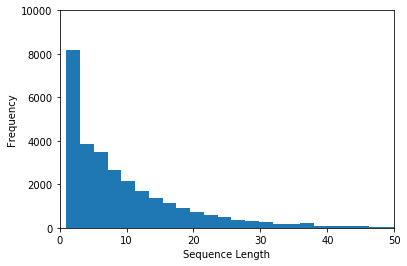

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['num_words'], 3000)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 50, 0, 10000])
plt.show()

In [0]:
maxSeqLength = 15 #Maximum length of sentence

In [0]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())
  
data['cleaned_lines'] = data['lines'].apply(cleanSentences)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,seasons,episodes,roles,lines,female,num_words,cleaned_lines
1,1,1,Phoebe,Do you think they have yesterday's daily news?,1,8,do you think they have yesterdays daily news
2,1,1,Monica,Why?,1,1,why
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r...",1,10,just wanna check my horoscope see if it was right
4,1,1,Monica,"Oh my God. Phoebe. Don't look now, but behind...",1,29,oh my god phoebe dont look now but behind us ...
5,1,1,Phoebe,"Where? Ooh, come to Momma.",1,5,where ooh come to momma
6,1,1,Monica,"He's coming. Be cool, be cool, be cool.",1,8,hes coming be cool be cool be cool
9,1,1,Phoebe,We should do something. Whistle.,1,5,we should do something whistle
10,1,1,Monica,We are not going to whistle.,1,6,we are not going to whistle
11,1,1,Phoebe,"Come on, do it.",1,4,come on do it
12,1,1,Monica,No!,1,1,no


In [0]:
def short(string):
  return len(string.split()) <= maxSeqLength
  
data = data[data['cleaned_lines'].apply(short)]
data

,seasons,episodes,roles,lines,female,num_words,cleaned_lines
1,1,1,Phoebe,Do you think they have yesterday's daily news?,1,8,do you think they have yesterdays daily news
2,1,1,Monica,Why?,1,1,why
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r...",1,10,just wanna check my horoscope see if it was right
5,1,1,Phoebe,"Where? Ooh, come to Momma.",1,5,where ooh come to momma
6,1,1,Monica,"He's coming. Be cool, be cool, be cool.",1,8,hes coming be cool be cool be cool
9,1,1,Phoebe,We should do something. Whistle.,1,5,we should do something whistle
10,1,1,Monica,We are not going to whistle.,1,6,we are not going to whistle
11,1,1,Phoebe,"Come on, do it.",1,4,come on do it
12,1,1,Monica,No!,1,1,no
13,1,1,Phoebe,Do it!,1,2,do it


In [0]:
import tensorflow as tf

numDimensions = 50 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(15,)
[   41   804     0  1005    15  7446     5 13767     0     0     0     0
     0     0     0]
Instructions for updating:
Colocations handled automatically by placer.
(15, 50)


In [0]:
def make_index_vector(string):
  split = string.split()
  vec = np.zeros((maxSeqLength), dtype='int32')
  for i,word in enumerate(split):
    try:
        vec[i] = wordsList.index(word)
    except ValueError:
        vec[i] = 399999 #Vector for unknown words
  return vec
data['index_vector'] = data['cleaned_lines'].apply(make_index_vector)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,seasons,episodes,roles,lines,female,num_words,cleaned_lines,index_vector
1,1,1,Phoebe,Do you think they have yesterday's daily news?,1,8,do you think they have yesterdays daily news,"[88, 81, 269, 39, 33, 132893, 777, 172, 0, 0, ..."
2,1,1,Monica,Why?,1,1,why,"[738, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,1,1,Phoebe,"Just wanna check my horoscope, see if it was r...",1,10,just wanna check my horoscope see if it was right,"[120, 21128, 2375, 192, 66985, 253, 83, 20, 15..."
5,1,1,Phoebe,"Where? Ooh, come to Momma.",1,5,where ooh come to momma,"[111, 50199, 326, 4, 47733, 0, 0, 0, 0, 0, 0, ..."
6,1,1,Monica,"He's coming. Be cool, be cool, be cool.",1,8,hes coming be cool be cool be cool,"[69407, 781, 30, 3451, 30, 3451, 30, 3451, 0, ..."
9,1,1,Phoebe,We should do something. Whistle.,1,5,we should do something whistle,"[53, 189, 88, 645, 11071, 0, 0, 0, 0, 0, 0, 0,..."
10,1,1,Monica,We are not going to whistle.,1,6,we are not going to whistle,"[53, 32, 36, 222, 4, 11071, 0, 0, 0, 0, 0, 0, ..."
11,1,1,Phoebe,"Come on, do it.",1,4,come on do it,"[326, 13, 88, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
12,1,1,Monica,No!,1,1,no,"[84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
13,1,1,Phoebe,Do it!,1,2,do it,"[88, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [0]:
data.to_csv(pwd_path + "/friends_ext.csv",index=False)

# Reload the file

In [0]:
df = pd.read_csv(pwd_path + "/friends_ext.csv")
data = df[['female','index_vector']]
data

,female,index_vector
0,1,[ 88 81 269 39 33 132893 ...
1,1,[738 0 0 0 0 0 0 0 0 0 0 ...
2,1,[ 120 21128 2375 192 66985 253 83 ...
3,1,[ 111 50199 326 4 47733 0 0 ...
4,1,[69407 781 30 3451 30 3451 30 34...
5,1,[ 53 189 88 645 11071 0 0 ...
6,1,[ 53 32 36 222 4 11071 0 ...
7,1,[326 13 88 20 0 0 0 0 0 0 0 ...
8,1,[84 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
9,1,[88 20 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
del df

In [0]:
import numpy as np

def get_array(s):
  import json
  s = '['+ ','.join(s.strip()[1:-1].split()) +']'
  return np.array(json.loads(s))

data['index_vector'] = data['index_vector'].apply(get_array)
data

,female,index_vector
0,1,"[88, 81, 269, 39, 33, 132893, 777, 172, 0, 0, ..."
1,1,"[738, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,1,"[120, 21128, 2375, 192, 66985, 253, 83, 20, 15..."
3,1,"[111, 50199, 326, 4, 47733, 0, 0, 0, 0, 0, 0, ..."
4,1,"[69407, 781, 30, 3451, 30, 3451, 30, 3451, 0, ..."
5,1,"[53, 189, 88, 645, 11071, 0, 0, 0, 0, 0, 0, 0,..."
6,1,"[53, 32, 36, 222, 4, 11071, 0, 0, 0, 0, 0, 0, ..."
7,1,"[326, 13, 88, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
8,1,"[84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,1,"[88, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [0]:
import tensorflow as tf

data_ = data[:40]
embs = np.empty((data_.shape[0], 15, 50))
for i in range(data_.shape[0]):
  with tf.Session() as sess:
      x = tf.nn.embedding_lookup(wordVectors,data_['index_vector'][i]).eval()
      print(i)
      embs[i] = x
      
embs.shape

Instructions for updating:
Colocations handled automatically by placer.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


(40, 15, 50)

In [0]:
data

,female,index_vector,sent_emb
0,1,"[88, 81, 269, 39, 33, 132893, 777, 172, 0, 0, ...","[[0.29605, -0.13841, 0.043774, -0.38744, 0.122..."
1,1,"[738, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0.32386, 0.011154, 0.23443, -0.18039, 0.6233..."
2,1,"[120, 21128, 2375, 192, 66985, 253, 83, 20, 15...","[[0.17698, 0.065221, 0.28548, -0.4243, 0.7499,..."
3,1,"[111, 50199, 326, 4, 47733, 0, 0, 0, 0, 0, 0, ...","[[0.69237, 0.44971, -0.20293, -0.16783, 0.3050..."
4,1,"[69407, 781, 30, 3451, 30, 3451, 30, 3451, 0, ...","[[-0.21653, -0.76917, 0.51482, -0.8322, -0.392..."
5,1,"[53, 189, 88, 645, 11071, 0, 0, 0, 0, 0, 0, 0,...","[[0.57387, -0.32729, 0.070521, -0.4198, 0.862,..."
6,1,"[53, 32, 36, 222, 4, 11071, 0, 0, 0, 0, 0, 0, ...","[[0.57387, -0.32729, 0.070521, -0.4198, 0.862,..."
7,1,"[326, 13, 88, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[0.5267, 0.11441, 0.14093, -0.40644, 0.34111,..."
8,1,"[84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0.34957, 0.40147, -0.012561, 0.13743, 0.4008..."
9,1,"[88, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0.29605, -0.13841, 0.043774, -0.38744, 0.122..."


In [0]:
# import tensorflow as tf

# with tf.device('/device:GPU:0'):
#   pass
# # config = tf.ConfigProto()
# # config.gpu_options.allow_growth = True

# with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
#   def get_emb(idxVec):
#     return tf.nn.embedding_lookup(wordVectors,idxVec).eval()

#   data['sent_emb'] = data['index_vector'].apply(get_emb)
  
# data

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7434228319043393629
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18365586085810565705
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3946311161511800568
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14351945617081782782
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
lstm_size = 256
lstm_layers = 2
batch_size = 500
learning_rate = 0.001
embed_size = 300
n_words = len(vocab_to_int) + 1 # Add 1 for 0 added to vocab
# Create the graph object
tf.reset_default_graph()
with tf.name_scope('inputs'):
    inputs_ = tf.placeholder(tf.int32, [None, None], name="inputs")
    labels_ = tf.placeholder(tf.int32, [None, None], name="labels")
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
# Sizeof embedding vectors (number of units in the embedding layer)
with tf.name_scope("Embeddings"):
    embedding = tf.Variable(tf.random_uniform((n_words, embed_size), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs_)
def lstm_cell():
    # Your basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size, reuse=tf.get_variable_scope().reuse)
    # Add dropout to the cell
    return tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
with tf.name_scope("RNN_layers"):
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(lstm_layers)])
    
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)
with tf.name_scope("RNN_forward"):
    outputs, final_state = tf.nn.dynamic_rnn(cell, embed, initial_state=initial_state)
with tf.name_scope('predictions'):
    predictions = tf.contrib.layers.fully_connected(outputs[:, -1], 1, activation_fn=tf.sigmoid)
    tf.summary.histogram('predictions', predictions)
with tf.name_scope('cost'):
    cost = tf.losses.mean_squared_error(labels_, predictions)
    tf.summary.scalar('cost', cost)
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    
    

NameError: ignored

In [0]:
def get_batches(x, y, batch_size=100):
    
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]
epochs = 10
# with graph.as_default():
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter('./logs/tb/train', sess.graph)
    test_writer = tf.summary.FileWriter('./logs/tb/test', sess.graph)
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_size), 1):
            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 0.5,
                    initial_state: state}
            summary, loss, state, _ = sess.run([merged, cost, final_state, optimizer], feed_dict=feed)
#             loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
train_writer.add_summary(summary, iteration)
        
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))
if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_size):
                    feed = {inputs_: x,
                            labels_: y[:, None],
                            keep_prob: 1,
                            initial_state: val_state}
#                     batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    summary, batch_acc, val_state = sess.run([merged, accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
            test_writer.add_summary(summary, iteration)
            saver.save(sess, "checkpoints/sentiment_manish.ckpt")
    saver.save(sess, "checkpoints/sentiment_manish.ckpt")